In [96]:
import pandas as pd
import numpy as np
from log_reg_util import one_hot, one_cold
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [74]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [17]:
data = pd.read_csv("data/data.csv", sep=' ')
target = pd.read_csv("data/target.csv", sep=' ')

In [53]:
X = data.values
y = np.array(one_hot(target.values, [0., 1.]))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [40]:
def nll(y_true_, y_pred_):
    EPSILON = 1e-8
    y_true_, y_pred_ = np.atleast_2d(y_true_), np.atleast_2d(y_pred_)
    loglikelihoods = np.sum(np.log(EPSILON + y_pred_) * y_true_, axis=1)
    return -np.mean(loglikelihoods)

In [41]:
def softmax(vec):
    vec_exp = np.exp(vec)
    return vec_exp/np.sum(vec_exp)

In [105]:
def predict(X_, W_, b_):
    return np.apply_along_axis(np.argmax, 1, np.dot(X_, W_) + b_)

In [55]:
def gradient_descent(X_mat, y_mat, learning_rate, break_early=True, threshold = 5e-5, report=False):
    n_observations = X_mat.shape[0]
    n_classes = y_mat.shape[1]
    n_features = X_mat.shape[1]
    print(n_observations, n_classes, n_features)
    
    total_error = np.zeros((n_observations, n_classes))
    
    W_estimate = np.zeros((n_features, n_classes))
    b_estimate = np.zeros(y_mat.shape[1])
   
    for i, (x, y) in enumerate(zip(X_mat, y_mat)):
        y_est = np.add(np.dot(x, W_estimate), b_estimate)
        y_est = np.apply_along_axis(softmax, 0, y_est)
        est_term =  np.subtract(y_est, y)

        b_gradient = est_term
        W_gradient = np.outer(x, est_term)

        b_estimate = np.subtract(b_estimate, learning_rate*b_gradient)
        W_estimate = np.subtract(W_estimate, learning_rate*W_gradient)

        total_error[i] = nll(y_mat, y_est)
        
        if report and (i+1) % 100 == 0:
            report_epoch(X_mat[:i], y_mat[:i], W_estimate, b_estimate, epoch=i+1)

    return (W_estimate, b_estimate, total_error)

In [111]:
W, b, err = gradient_descent(X_train, y_train, 0.0001)

7999 2 130


In [112]:
err.shape

(7999, 2)

In [113]:
err_mean = np.apply_along_axis(np.mean, 1, err)

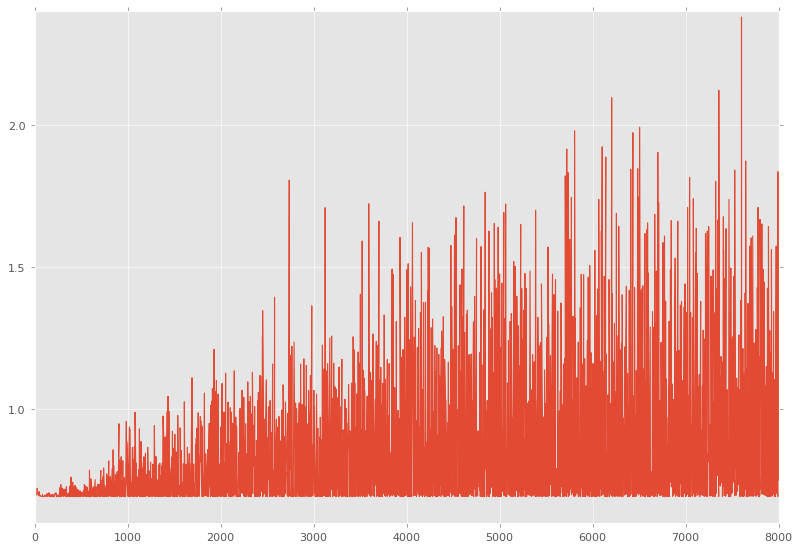

In [114]:
plt.plot(err_mean)

In [115]:
f1_score(one_cold(y_val), predict(X_val, W, b))

0.8226415094339623

---